In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')

In [5]:
df = pd.read_csv('daily-total-female-births.csv')
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Text(0, 0.5, 'total births')

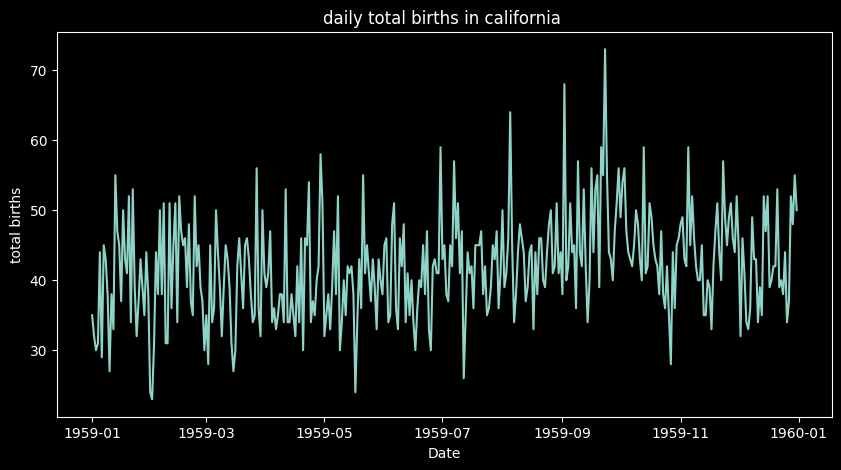

In [127]:
plt.figure(figsize=(10,5))
sns.lineplot(df,x=df.index,y='Births')
plt.title('daily total births in california ')
plt.ylabel('total births')



#### **testing the data stationarity with ADF**

In [12]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Births'])
print('ADF Stationary:%f' % adf_test[0])
print('the p value :%f' % adf_test[1])

ADF Stationary:-4.808291
the p value :0.000052


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

Season_decom = seasonal_decompose(df,model='additive')


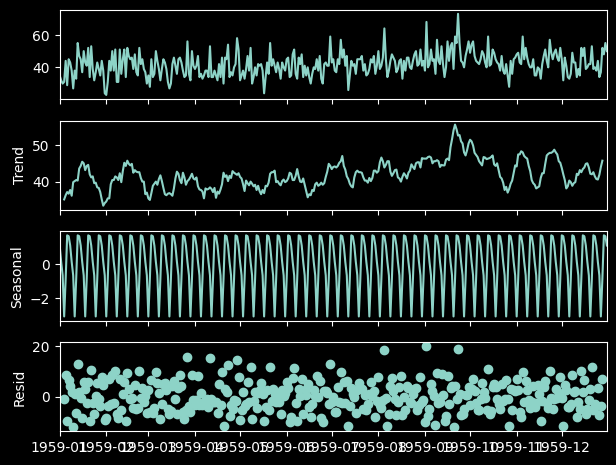

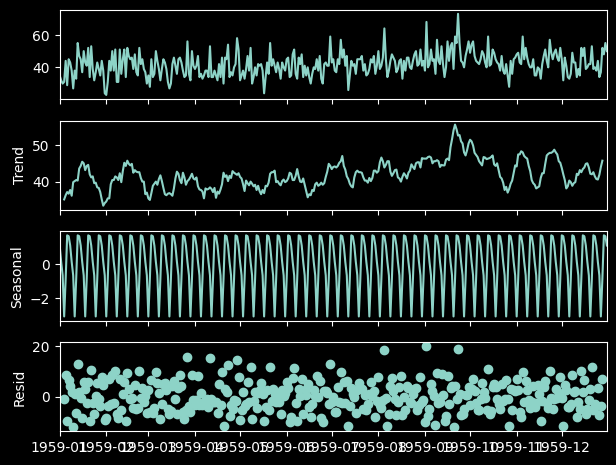

In [48]:
Season_decom.plot()

In [41]:
mv_avg = df.rolling(window=30).mean()
mv_std = df.rolling(window=30).std()

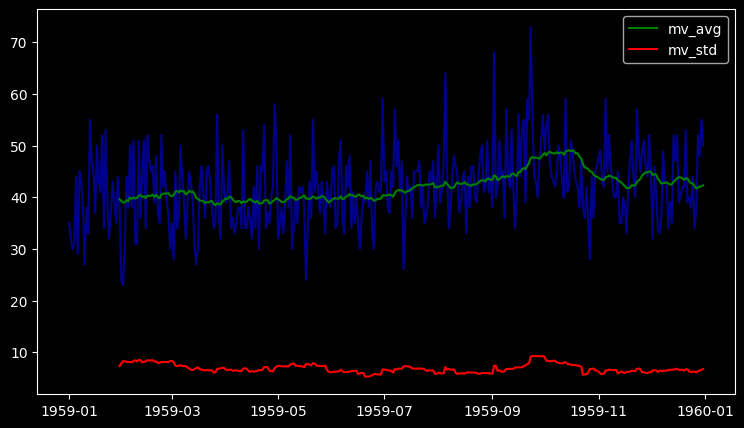

In [45]:
plt.figure(figsize=(9,5))
plt.plot(df,color='darkblue')
plt.plot(mv_avg,color='green',label='mv_avg')
plt.plot(mv_std,color='red',label="mv_std")
plt.legend(loc='best')

we can see that the p value is above 0.05 meaning that our data is stationary

#### **Finding ARIMA Parameters**

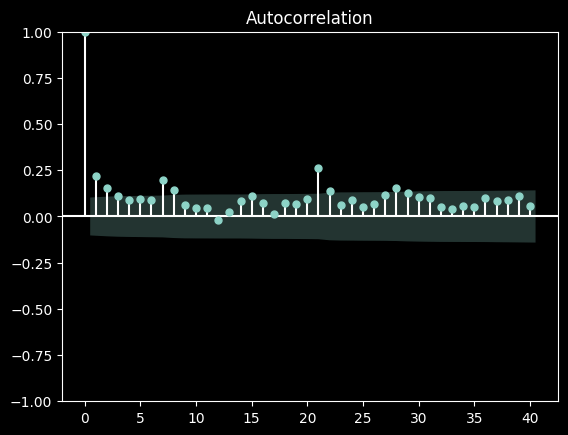

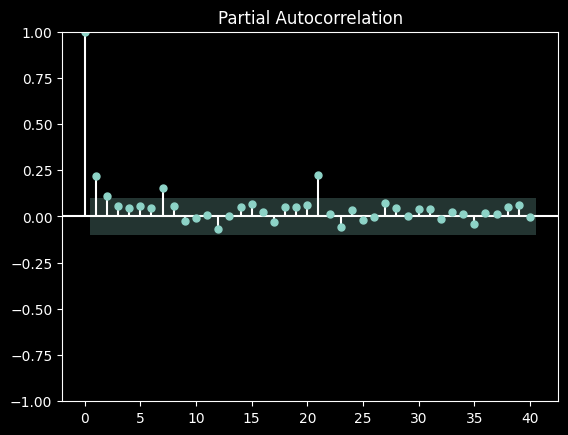

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Births'],lags=40)
plot_pacf(df['Births'],lags=40)
plt.show()

In [54]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Births'],order=(1,0,1))
model_fit = model.fit()

c:\Users\ayman\anaconda3\envs\env_1-\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [56]:
forcast = model_fit.get_forecast(steps=30)

In [62]:
from sklearn.metrics import mean_squared_error

c:\Users\ayman\anaconda3\envs\env_1-\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Text(0, 0.5, 'total births')

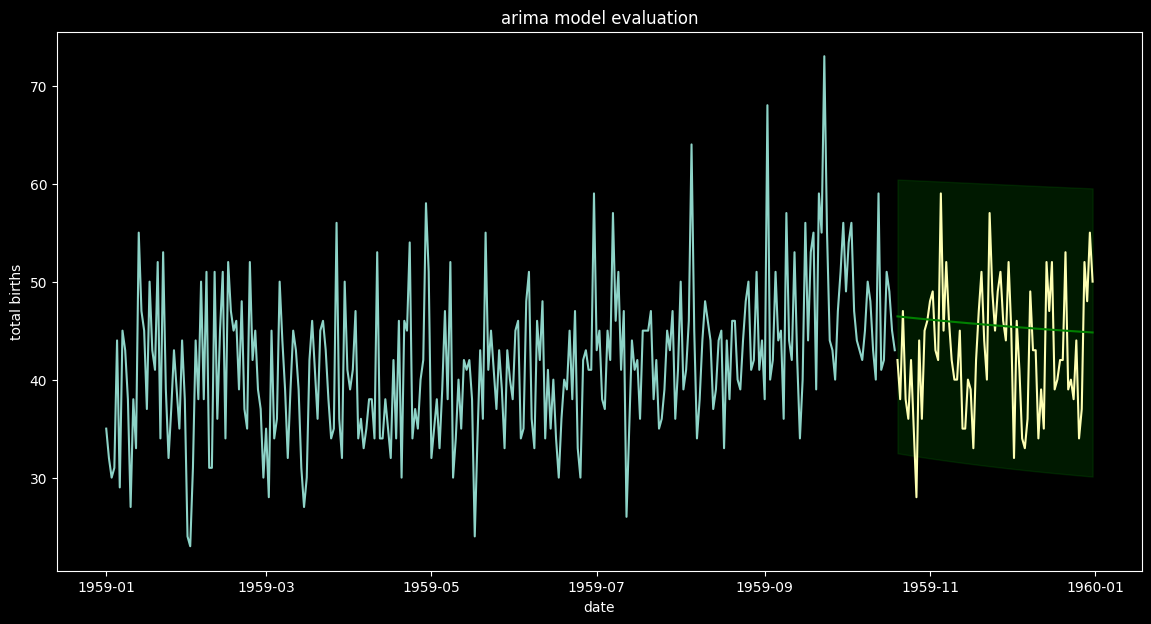

In [ ]:
#splitting our data into training and testing data 
train_size = int(len(df) * 0.8)
train,test = df[:train_size],df[train_size:len(df)]


#fitting the arima model
model_train = ARIMA(train,order=(1,0,1))
model_train_fit = model_train.fit()

#forcasting on test data
test_forecast = model_train_fit.get_forecast(steps=len(test))
forecasted_values = test_forecast.predicted_mean
#making a serie of forecasts 
test_forecast_serie = pd.Series(forecasted_values,index=test.index)


#MSE

#ploting the resulat
plt.figure(figsize=(14,7))
plt.plot(train['Births'],label='training data')
plt.plot(test['Births'],label='actual data')
plt.plot(test_forecast_serie,label='forecasted data',color='green')
plt.fill_between(test.index,test_forecast.conf_int().iloc[:,0],test_forecast.conf_int().iloc[:,1],color='green',alpha=0.20)
plt.title('arima model evaluation')
plt.xlabel('date')
plt.ylabel('total births')






c:\Users\ayman\anaconda3\envs\env_1-\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ayman\anaconda3\envs\env_1-\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\ayman\anaconda3\envs\env_1-\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


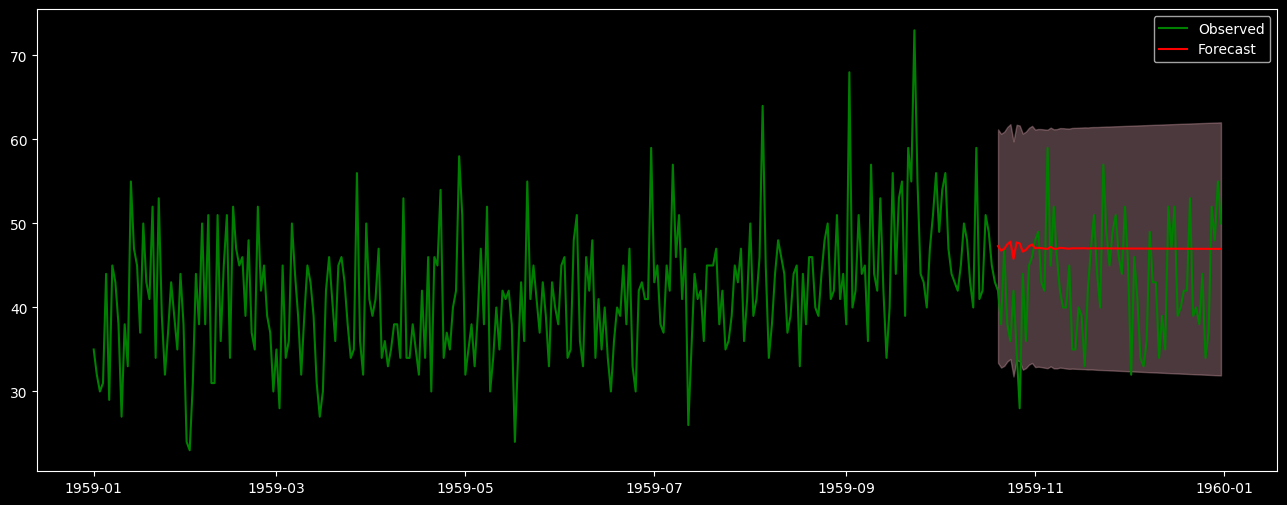

In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(train['Births'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=len(test))  
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(16, 6))
plt.plot(df['Births'], label='Observed',color='green')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [119]:
test_forecast.conf_int()

,lower Births,upper Births
1959-10-20,32.486573,60.417327
1959-10-21,32.441438,60.404966
1959-10-22,32.396739,60.392560
1959-10-23,32.352473,60.380111
1959-10-24,32.308634,60.367622
...,...,...
1959-12-27,30.205162,59.561319
1959-12-28,30.180949,59.549415
1959-12-29,30.156945,59.537548
1959-12-30,30.133148,59.525719
